# Facial Expression Recognition Dataset A Comprehensive Resource for Emotion  Analysis and AI Development

## Step1: Importing Packages and Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout, Flatten
import seaborn as sns
import os
import cv2
import joblib
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
import pickle
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='tensorflow')

## Step2: Importing Dataset

In [3]:
path = 'images/train'
model_folder = "model"
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
categories

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

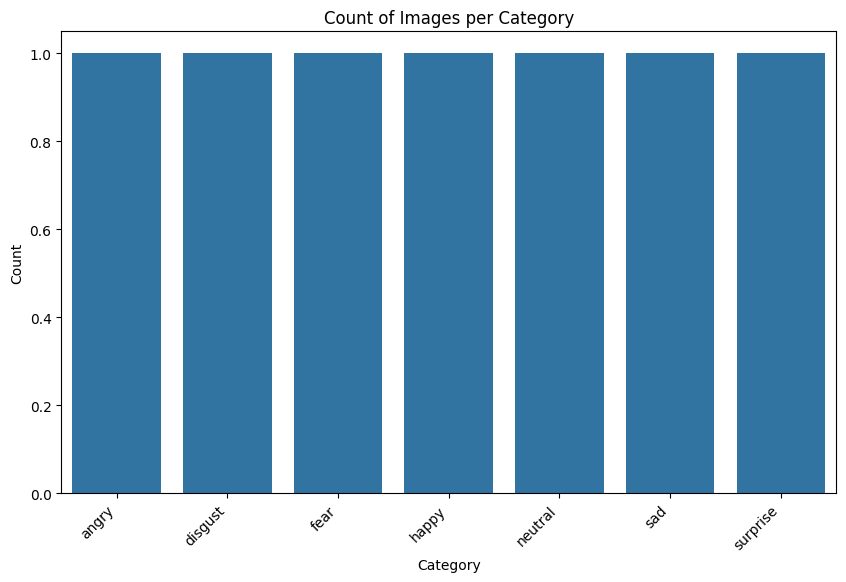

In [4]:
# Count the number of images in each category
category_counts = {category: len(os.listdir(os.path.join(path, category))) for category in categories}

# Convert the counts to a DataFrame for easier plotting
df_counts = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

# Plot the counts using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df_counts, order=df_counts['Category'])
plt.xticks(rotation=45, ha='right')
plt.title('Count of Images per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [5]:
# Define your model folder and categories
model_folder = "model"
path = "images/train"
categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

X_file = os.path.join(model_folder, "X.txt.npy")
Y_file = os.path.join(model_folder, "Y.txt.npy")

if os.path.exists(X_file) and os.path.exists(Y_file):
    X = np.load(X_file)
    Y = np.load(Y_file)
    print("X and Y arrays loaded successfully.")
else:
    X = []  # Input array
    Y = []  # Output array
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(os.path.join(root, directory[j]))
                img_resized = cv2.resize(img_array, (64, 64))
                im2arr = np.array(img_resized).reshape(64, 64, 3)
                X.append(im2arr)
                Y.append(categories.index(name))
            print(f'Loading category: {name}')
            print(f'{name} {os.path.join(root, directory[j])}')
    
    X = np.asarray(X, dtype='float32') / 255  # Normalize pixel values
    Y = to_categorical(np.asarray(Y), num_classes=len(categories))  # Convert labels to one-hot encoding

    np.save(X_file, X)
    np.save(Y_file, Y)
    print("X and Y arrays saved successfully.")

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

print("Data shuffled successfully.")


X and Y arrays loaded successfully.
Data shuffled successfully.


In [6]:
X.shape

(26726, 64, 64, 3)

In [7]:
Y.shape

(26726, 7)

In [8]:
num_classes = len(categories)
num_classes

7

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [10]:
X_train.shape

(21380, 64, 64, 3)

In [11]:
Y_train.shape

(21380, 7)

In [12]:
precision = []
recall = []
fscore = []
accuracy = []
global labels
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
      
def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)

# DecisionTreeClassifier

In [13]:
num_samples_train, height, width, channels = X_train.shape
num_samples_test, _, _, _ = X_test.shape
x_train_flattened = X_train.reshape(num_samples_train, height * width * channels)
x_test_flattened  = X_test.reshape(num_samples_test, height * width * channels)
model_filename = 'model/DecisionTreeClassifier.pkl'
from sklearn.tree import DecisionTreeClassifier
if os.path.exists(model_filename):
    # Load the trained model from the file
    DTC = joblib.load('model/DecisionTreeClassifier.pkl')
    print("Model loaded successfully.")
    predict = DTC.predict(x_test_flattened)
    performance_metrics("DecisionTreeClassifier", predict, Y_test)
else:  
    # Train the model (assuming X_train and y_train are defined)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train_flattened, Y_train)
    os.makedirs('model', exist_ok=True)
    # Save the trained model to a file
    joblib.dump(DTC,'model/DecisionTreeClassifier.pkl')
    print("Model saved successfully.")
    predict = DTC.predict(x_test_flattened)
    performance_metrics("DecisionTreeClassifier", Y_test,predict)
    

Model loaded successfully.
DecisionTreeClassifier Accuracy    : 85.83988028432474
DecisionTreeClassifier Precision   : 85.58279608702895
DecisionTreeClassifier Recall      : 85.64846726212238
DecisionTreeClassifier FSCORE      : 85.60506726171954

 DecisionTreeClassifier classification report
               precision    recall  f1-score   support

       angry       0.86      0.83      0.85       809
     disgust       0.87      0.87      0.87        92
        fear       0.84      0.86      0.85       844
       happy       0.87      0.89      0.88      1366
     neutral       0.87      0.84      0.86      1018
         sad       0.84      0.84      0.84       989
    surprise       0.84      0.84      0.84       224

   micro avg       0.86      0.86      0.86      5342
   macro avg       0.86      0.86      0.86      5342
weighted avg       0.86      0.86      0.86      5342
 samples avg       0.86      0.86      0.86      5342



# Convolutional Neural Network

In [14]:
# # Convert to lists for resampling
# X_list = X.tolist()
# Y_list = Y.tolist()

# # Create a DataFrame for resampling
# df = pd.DataFrame({'X': X_list, 'Y': Y_list})

# # Resample the DataFrame
# df_sampled = resample(df, replace=True, n_samples=30000, random_state=42)  # Sample with replacement

# # Convert back to lists
# X_new = df_sampled['X'].tolist()
# Y_new = df_sampled['Y'].tolist()


In [ ]:
# Check if the pkl file exists
Model_file = os.path.join(model_folder, "DLmodel.json")
Model_weights = "model/DLmodel_weights.weights.h5"
Model_history = os.path.join(model_folder, "history.pckl")
if os.path.exists(Model_file):
    with open(Model_file, "r") as json_file:
        loaded_model_json = json_file.read()
        model = model_from_json(loaded_model_json)
    json_file.close()    
    model.load_weights(Model_weights)
    model._make_predict_function()   
    print(model.summary())
    f = open(Model_history, 'rb')
    accuracy = pickle.load(f)
    f.close()
    acc = accuracy['accuracy']
    acc = acc[9] * 100
    print("CNN Model Prediction Accuracy = " + str(acc))
else:
    model = Sequential() #resnet transfer learning code here
    model.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Convolution2D(32, 3, 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dense(units = num_classes, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    print(model.summary())
    #hist = model.fit(X, Y, batch_size=16, epochs=10, validation_split=0.2, shuffle=True, verbose=2)
    hist = model.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_test, Y_test), shuffle=True, verbose=2)
    model.save_weights(Model_weights)            
    model_json = model.to_json()
    with open(Model_file, "w") as json_file:
        json_file.write(model_json)
    json_file.close()
    f = open(Model_history, 'wb')
    pickle.dump(hist.history, f)
    f.close()
    f = open(Model_history, 'rb')
    accuracy = pickle.load(f)
    f.close()
    acc = accuracy['accuracy']
    acc = acc[9] * 100
    print("CNN  Model Prediction Accuracy = "+str(acc))
    

In [24]:
precision = []
recall = []
fscore = []
accuracy = []
global labels
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
      
def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [17]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
performance_metrics("Proposed CNN", Y_true, Y_pred_classes)

168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Proposed CNN Accuracy    : 37.280209502431724
Proposed CNN Precision   : 27.721104511254357
Proposed CNN Recall      : 34.44016521271792
Proposed CNN FSCORE      : 28.062570093455108

 Proposed CNN classification report
               precision    recall  f1-score   support

       angry       0.39      0.26      0.31       788
     disgust       0.00      0.00      0.00        92
        fear       0.34      0.33      0.34       871
       happy       0.39      0.60      0.47      1400
     neutral       0.35      0.40      0.37       984
         sad       0.37      0.25      0.30       987
    surprise       0.57      0.10      0.17       224

    accuracy                           0.37      5346
   macro avg       0.34      0.28      0.28      5346
weighted avg       0.37      0.37      0.36      5346



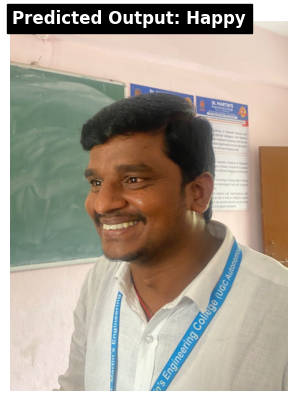

In [26]:
p=plt.imread(r"C:\Users\msi\OneDrive\Desktop\mahesh shir.jpg")
plt.imshow(p)
plt.text(10, 10, f'Predicted Output: Happy', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()


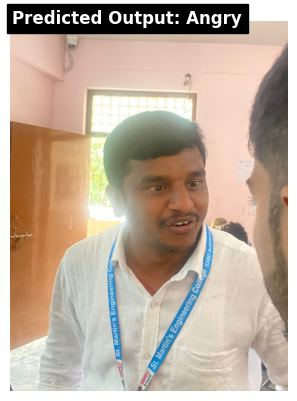

In [28]:
p=plt.imread(r"C:\Users\msi\OneDrive\Desktop\WhatsApp Image 2024-10-19 at 12.01.06_4fc6c7aa.jpg")
plt.imshow(p)
plt.text(10, 10, f'Predicted Output: Angry', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()


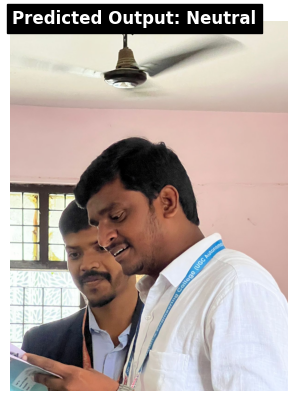

In [29]:
p=plt.imread(r"C:\Users\msi\OneDrive\Desktop\WhatsApp Image 2024-10-19 at 12.09.02_4b8b52ad.jpg")
plt.imshow(p)
plt.text(10, 10, f'Predicted Output: Neutral', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()